In [17]:
import pandas as pd

In [32]:
import pandas as pd

# Load Excel files
msft = pd.read_excel(r"C:/Users/vaibh/Downloads/Microsoft_Financials_FY2021-2023.xlsx")
aapl = pd.read_excel(r"C:/Users/vaibh/Downloads/Apple_Financials_FY2022-2024.xlsx")
tsla = pd.read_excel(r"C:/Users/vaibh/Downloads/Tesla_Financials_FY2022-2024.xlsx")

# Add company labels
msft["Company"] = "Microsoft"
aapl["Company"] = "Apple"
tsla["Company"] = "Tesla"

# Growth calculation function
def add_growth(df):
    df = df.sort_values(["Fiscal Year"])
    df["Revenue Growth (%)"]     = df["Total Revenue (USD Millions)"].pct_change() * 100
    df["Net Income Growth (%)"]  = df["Net Income (USD Millions)"].pct_change() * 100
    df["Assets Growth (%)"]      = df["Total Assets (USD Millions)"].pct_change() * 100
    df["Liabilities Growth (%)"] = df["Total Liabilities (USD Millions)"].pct_change() * 100
    df["Operating CF Growth (%)"]= df["Cash Flow from Operating Activities (USD Millions)"].pct_change() * 100
    return df

# Apply function
msft = add_growth(msft)
aapl = add_growth(aapl)
tsla = add_growth(tsla)

# Merge into one DataFrame
all_df = pd.concat([msft, aapl, tsla], ignore_index=True)
all_df = all_df.sort_values(["Company","Fiscal Year"])

print(all_df)


     Company  Fiscal Year  Total Revenue (USD Millions)  \
3      Apple         2022                        394328   
4      Apple         2023                        383285   
5      Apple         2024                        391035   
0  Microsoft         2021                        168088   
1  Microsoft         2022                        198270   
2  Microsoft         2023                        211915   
6      Tesla         2022                         81462   
7      Tesla         2023                         96873   
8      Tesla         2024                         97690   

   Net Income (USD Millions)  Total Assets (USD Millions)  \
3                      99803                       352755   
4                      96995                       352583   
5                      93736                       364981   
0                      61271                       333779   
1                      72738                       364840   
2                      72361               

In [33]:
num_cols = [
    "Total Revenue (USD Millions)","Net Income (USD Millions)",
    "Total Assets (USD Millions)","Total Liabilities (USD Millions)",
    "Cash Flow from Operating Activities (USD Millions)"
]
for c in num_cols: 
    all_df[c] = pd.to_numeric(all_df[c], errors="coerce")
all_df = all_df.sort_values(["Company","Fiscal Year"])


In [34]:
all_df["Net Margin (%)"]  = 100*all_df["Net Income (USD Millions)"]/all_df["Total Revenue (USD Millions)"]
all_df["OCF Margin (%)"]  = 100*all_df["Cash Flow from Operating Activities (USD Millions)"]/all_df["Total Revenue (USD Millions)"]
all_df["Leverage (Liab/Assets)"] = all_df["Total Liabilities (USD Millions)"]/all_df["Total Assets (USD Millions)"]


In [35]:
summary = (
    all_df.groupby("Company")[[
        "Revenue Growth (%)","Net Income Growth (%)",
        "Assets Growth (%)","Liabilities Growth (%)","Operating CF Growth (%)",
        "Net Margin (%)","OCF Margin (%)","Leverage (Liab/Assets)"
    ]].mean().round(2)
)
print(summary)


           Revenue Growth (%)  Net Income Growth (%)  Assets Growth (%)  \
Company                                                                   
Apple                   -0.39                  -3.09               1.73   
Microsoft               12.42                   9.10              11.11   
Tesla                    9.88                 -22.16              14.65   

           Liabilities Growth (%)  Operating CF Growth (%)  Net Margin (%)  \
Company                                                                      
Apple                        1.10                    -1.84           24.86   
Microsoft                    1.70                     7.20           35.76   
Tesla                        6.31                     1.24           11.92   

           OCF Margin (%)  Leverage (Liab/Assets)  
Company                                            
Apple               29.91                    0.84  
Microsoft           43.96                    0.53  
Tesla               15.70

In [36]:
def cagr(series, years):
    s = series.dropna()
    if len(s) < 2: return pd.NA
    return (s.iloc[-1]/s.iloc[0])**(1/years) - 1

cagr_out = []
for co, g in all_df.groupby("Company"):
    g = g.sort_values("Fiscal Year")
    yrs = g["Fiscal Year"].iloc[-1] - g["Fiscal Year"].iloc[0]
    cagr_out.append({
        "Company": co,
        "Revenue CAGR (%)": round(100*cagr(g["Total Revenue (USD Millions)"], yrs), 2),
        "Net Income CAGR (%)": round(100*cagr(g["Net Income (USD Millions)"], yrs), 2)
    })
cagr_df = pd.DataFrame(cagr_out)
print(cagr_df)


     Company  Revenue CAGR (%)  Net Income CAGR (%)
0      Apple             -0.42                -3.09
1  Microsoft             12.28                 8.67
2      Tesla              9.51               -25.15


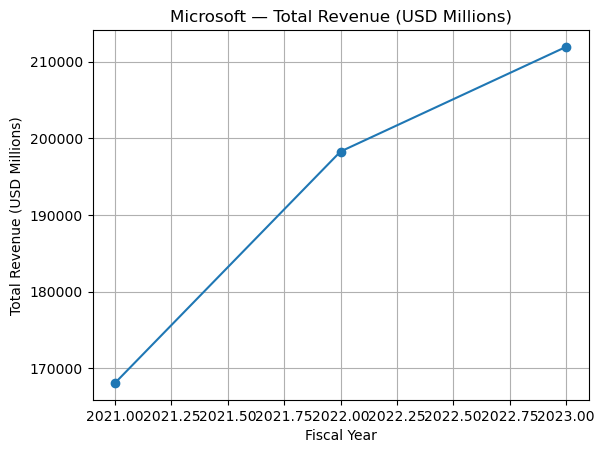

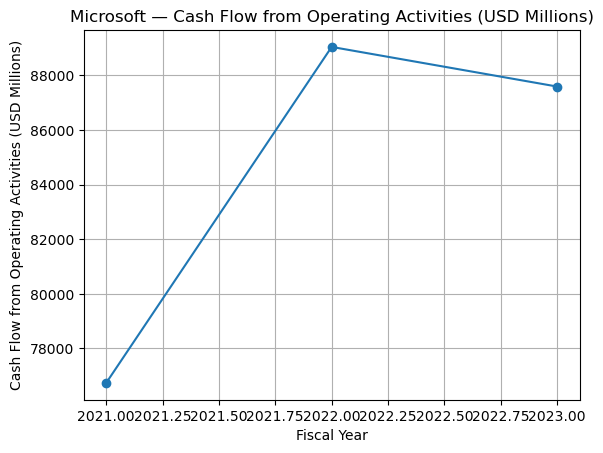

In [38]:
import matplotlib.pyplot as plt

metrics = [
    "Total Revenue (USD Millions)",
    "Net Income (USD Millions)",
    "Cash Flow from Operating Activities (USD Millions)"
]

msft = all_df[all_df["Company"]=="Microsoft"].sort_values("Fiscal Year")

for metric in metrics:
    plt.figure()
    plt.plot(msft["Fiscal Year"], msft[metric], marker="o")
    plt.title(f"Microsoft — {metric}")
    plt.xlabel("Fiscal Year")
    plt.ylabel(metric)
    plt.grid(True)
    plt.show()


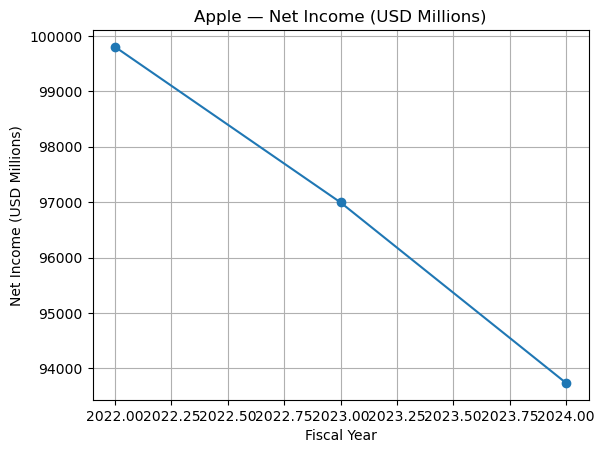

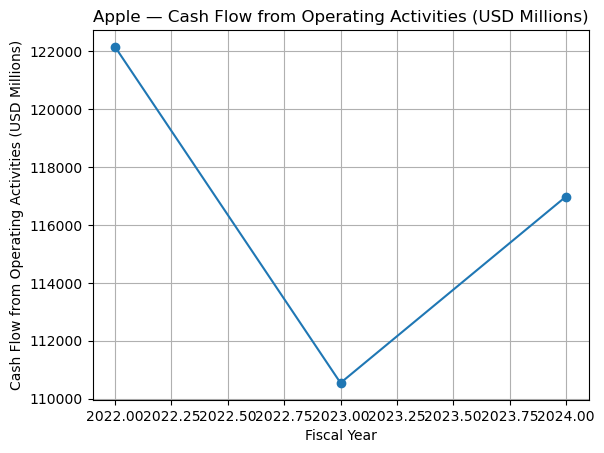

In [39]:
aapl = all_df[all_df["Company"]=="Apple"].sort_values("Fiscal Year")

for metric in metrics:
    plt.figure()
    plt.plot(aapl["Fiscal Year"], aapl[metric], marker="o")
    plt.title(f"Apple — {metric}")
    plt.xlabel("Fiscal Year")
    plt.ylabel(metric)
    plt.grid(True)
    plt.show()


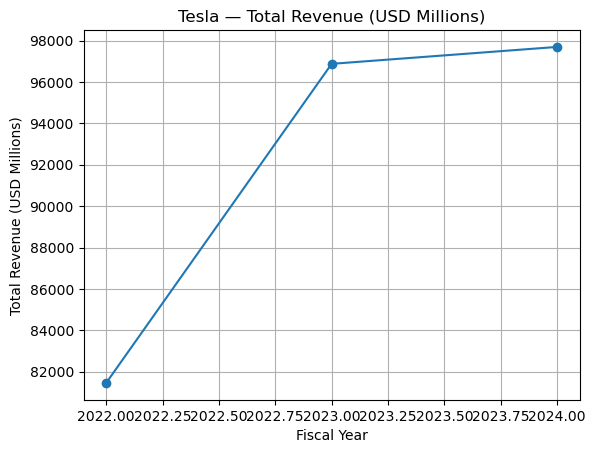

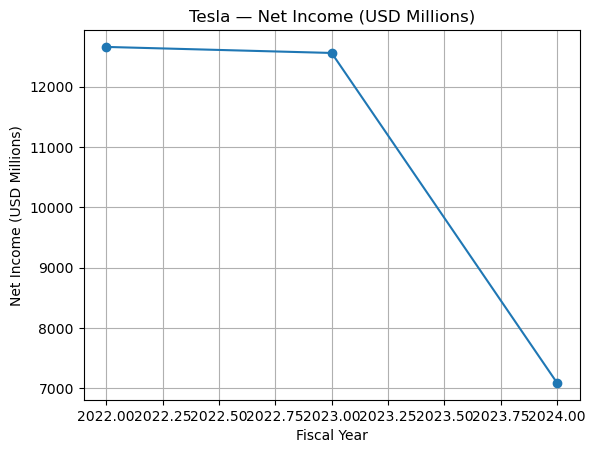

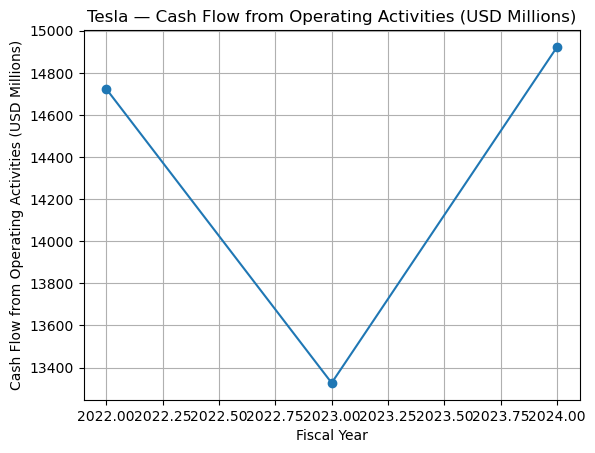

In [40]:
tsla = all_df[all_df["Company"]=="Tesla"].sort_values("Fiscal Year")

for metric in metrics:
    plt.figure()
    plt.plot(tsla["Fiscal Year"], tsla[metric], marker="o")
    plt.title(f"Tesla — {metric}")
    plt.xlabel("Fiscal Year")
    plt.ylabel(metric)
    plt.grid(True)
    plt.show()
